In [1]:
!pip install streamlit
!pip install gradio
!pip install squarify
!pip install plotly
!pip install --upgrade gradio


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#from google.colab import drive
import matplotlib.pyplot as plt
import os
import pandas as pd
import gradio as gr
import io
import seaborn as sns
import squarify
import plotly.express as px

Aperçu des données nettoyées :
     Chaines  1990  1991  1992  1993  1994  1995  1996  1997  1998  ...   
0   France 2   182   194   187   185   185   190   180   197   201  ...  \
1   France 3   193   191   191   189   192   205   209   194   207  ...   
2   France 4     0     0     0     0     0     0     0     0     0  ...   
3   France 5     0     0     0     0     0     0     0     0     0  ...   
4  France Ô3     0     0     0     0     0     0     0     0     0  ...   

    2014   2015   2016   2017   2018   2019   2020   2021   2022   2023  
0  153.0  130.0   99.0   93.0   98.0  119.0  176.0  127.0   92.0   91.0  
1  181.0  185.0  178.0  149.0  128.0  106.0  153.0  150.0  132.0  112.0  
2  149.0  150.0  145.0  153.0  130.0  115.0   91.0   24.0   28.0   22.0  
3    6.0    2.0   27.0   24.0   31.0   71.0   68.0   52.0   35.0   38.0  
4   50.0   50.0   51.0   51.0   46.0   34.0   14.0    NaN    NaN    NaN  

[5 rows x 35 columns]

Statistiques descriptives :
             1990     

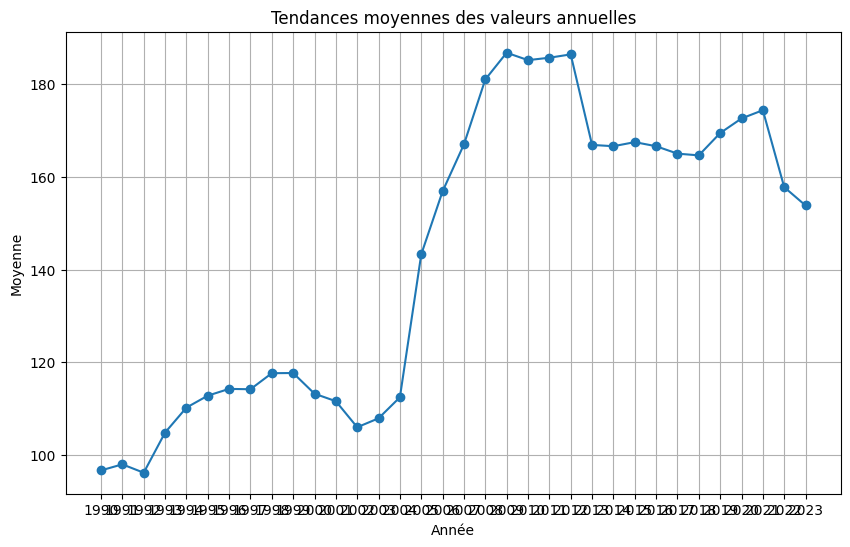


Valeurs manquantes par colonne :
Chaines    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       1
2006       1
2007       1
2008       1
2009       1
2010       1
2011       1
2012       1
2013       1
2014       1
2015       1
2016       1
2017       2
2018       2
2019       3
2020       2
2021       4
2022       4
2023       4
dtype: int64


In [4]:
# Charger les données
file_path = '../Data/DonneesCreees/Films_part1.csv'
data = pd.read_csv(file_path)

# Renommer la première colonne pour plus de clarté
data.rename(columns={data.columns[0]: "Chaines"}, inplace=True)

# Remplacer les tirets ("-") par des valeurs manquantes (0) et convertir en numérique si possible
data.replace("-", 0, inplace=True)
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')


# Aperçu des données nettoyées
print("Aperçu des données nettoyées :")
print(data.head())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(data.describe())

# Visualisation des tendances globales
data_mean = data.iloc[:, 1:].mean()  # Moyennes annuelles pour chaque année

# Graphique des moyennes annuelles
plt.figure(figsize=(10, 6))
plt.plot(data.columns[1:], data_mean, marker='o')
plt.title("Tendances moyennes des valeurs annuelles")
plt.xlabel("Année")
plt.ylabel("Moyenne")
plt.grid()
plt.show()

# Identification des valeurs manquantes
missing_data = data.isnull().sum()

# Affichage des colonnes avec le plus de valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(missing_data)

data = data.dropna()


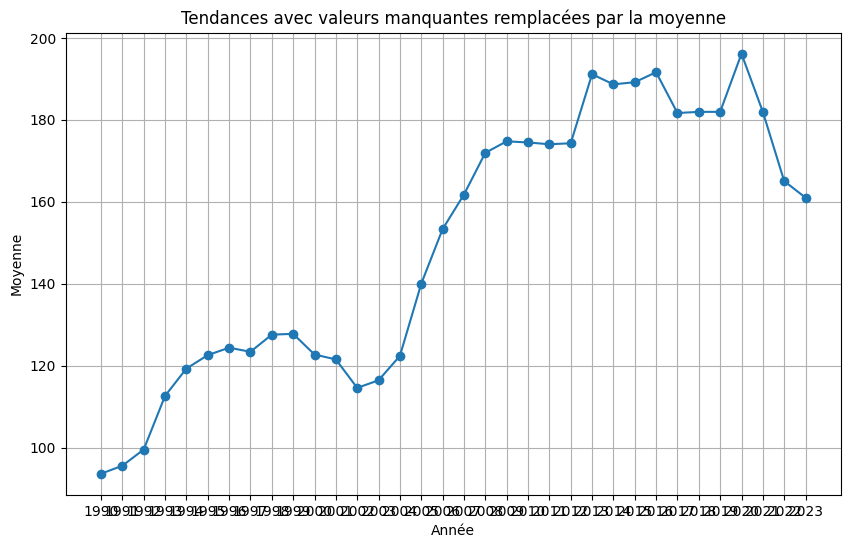

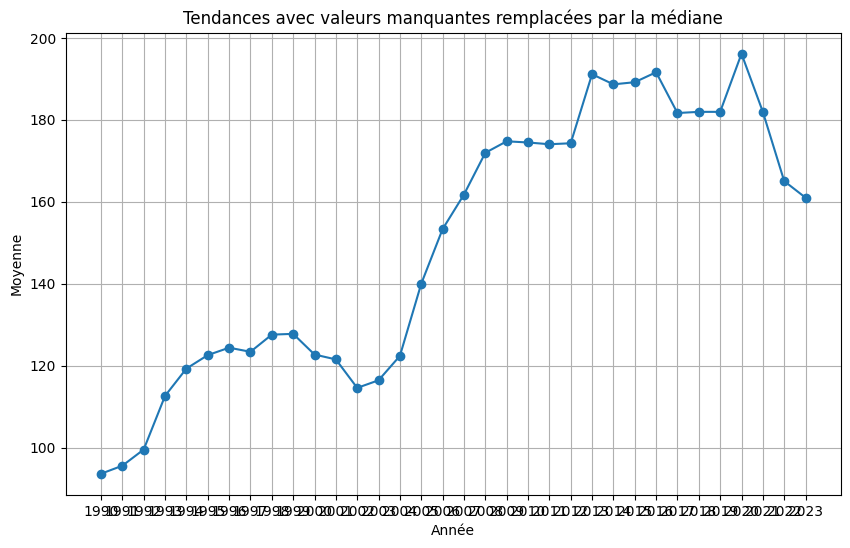

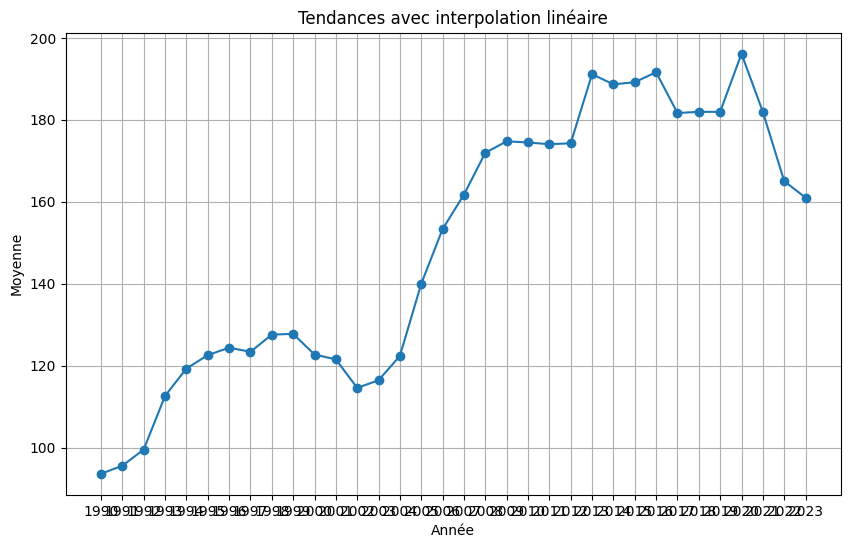


Valeurs manquantes par colonne (originales) :
Chaines    0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


In [5]:
# 1. Remplacer les valeurs manquantes par la moyenne de chaque colonne
data_mean_filled = data.copy()
for col in data_mean_filled.columns[1:]:
    data_mean_filled[col].fillna(data_mean_filled[col].mean(), inplace=True)

# 2. Remplacer les valeurs manquantes par la médiane de chaque colonne
data_median_filled = data.copy()
for col in data_median_filled.columns[1:]:
    data_median_filled[col].fillna(data_median_filled[col].median(), inplace=True)

# 3. Interpolation des valeurs manquantes
data_interpolated = data.copy()
data_interpolated.interpolate(method='linear', axis=0, inplace=True)

# Visualisation des tendances après chaque méthode
def plot_data(dataframe, title):
    data_mean = dataframe.iloc[:, 1:].mean()  # Moyennes annuelles pour chaque année
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.columns[1:], data_mean, marker='o')
    plt.title(title)
    plt.xlabel("Année")
    plt.ylabel("Moyenne")
    plt.grid()
    plt.show()

# Graphiques
plot_data(data_mean_filled, "Tendances avec valeurs manquantes remplacées par la moyenne")
plot_data(data_median_filled, "Tendances avec valeurs manquantes remplacées par la médiane")
plot_data(data_interpolated, "Tendances avec interpolation linéaire")

# Comparer les données originales
print("\nValeurs manquantes par colonne (originales) :")
print(data.isnull().sum())

c'etait juste pour verifier et en plus on remarque qu'on a presque le meme graphe pour les differente methde au final on laisse ou bien on remplace les (-) par des 0 et supprimer
les lignes ou on a beaucoup  des nd

In [6]:
# Fonction pour afficher le DataFrame
def afficher_dataframe():
    return data

# Créer l'interface Gradio
iface = gr.Interface(
    fn=afficher_dataframe,        # Fonction à appeler
    inputs=None,                  # Pas d'entrées nécessaires
    outputs=gr.Dataframe(label="Fichier Films_part1"),  # Composant de sortie
    title="Affichage du fichier Films_part1",
    description="Cette interface affiche les données du fichier Films_part1.csv."
)

# Lancer l'interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [7]:
liste_chaines = data["Chaines"].unique().tolist()

def generer_graphique(chaine_selection):
    if not chaine_selection:
        return "Veuillez sélectionner au moins une chaîne.", None

    # Filtrer les données pour les chaînes sélectionnées
    data_filtered = data[data['Chaines'].isin(chaine_selection)]

    # Vérifier si le filtre retourne des données
    if data_filtered.empty:
        return "Aucune donnée après filtrage", None

    # Transposer les données pour obtenir les années en index
    data_melted = data_filtered.melt(id_vars=["Chaines"], var_name="Année", value_name="Valeur")
    data_melted.dropna(subset=["Valeur"], inplace=True)

    # Convertir les années en numérique
    data_melted["Année"] = pd.to_numeric(data_melted["Année"], errors="coerce")

    # Filtrer les années non valides (par exemple, valeurs supérieures à 2025 ou inférieures à 1900)
    data_melted = data_melted[(data_melted["Année"] >= 1900) & (data_melted["Année"] <= 2025)]

    if data_melted.empty:
        return "Aucune donnée disponible après nettoyage des années.", None

    # Création du graphique
    fig, ax = plt.subplots(figsize=(12, 8))  # Augmenter la taille pour la lisibilité
    graph_data_found = False  # Flag pour vérifier si des données valides existent

    for chaine in chaine_selection:
        # Filtrer les données pour chaque chaîne
        filtered_data = data_melted[data_melted["Chaines"] == chaine]

        # Supprimer les valeurs nulles ou égales à zéro en début de série
        filtered_data = filtered_data[filtered_data["Valeur"] > 0]
        if filtered_data.empty:
            continue  # Passer cette chaîne si aucune donnée n'est disponible après nettoyage

        # Trier par année pour assurer la continuité
        filtered_data = filtered_data.sort_values("Année")

        # Tracer la courbe pour cette chaîne
        ax.plot(
            filtered_data["Année"],
            filtered_data["Valeur"],
            marker="o",
            label=chaine
        )
        graph_data_found = True  # Marquer que des données ont été trouvées

    # Vérifier si au moins une courbe a été ajoutée au graphique
    if not graph_data_found:
        return "Aucune donnée disponible pour générer le graphique.", None

    # Personnaliser les axes et le titre
    ax.set_title("Évolution des données par chaîne")
    ax.set_xlabel("Année")
    ax.set_ylabel("Valeur")
    ax.grid(True, linestyle='--', alpha=0.6)  # Ajouter une grille pour la lisibilité

    # Ajouter une légende décalée
    ax.legend(title="Chaîne", bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à droite
    plt.xticks(rotation=45)  # Rotation des années pour éviter le chevauchement
    plt.tight_layout()  # Ajuster les marges pour éviter les débordements

    # Retourner le graphique et un aperçu des données filtrées
    return fig, data_filtered.head(10)

# Interface Gradio
with gr.Blocks() as demo:
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez la/les chaîne(s) :",
        choices=liste_chaines,
        value=liste_chaines  # Par défaut, toutes les chaînes
    )
    btn = gr.Button("Générer le graphique")

    # gr.Plot() pour un graphique Matplotlib
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des données filtrées")

    btn.click(
        fn=generer_graphique,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Ce graphique représente l'évolution des nombres de films difuser pour différentes chaînes de télévision sur une période allant de 1990 à 2023.
Chaque chaîne est représentée par une courbe d'une couleur spécifique.
TF1 domine largement les autres chaînes avec des valeurs atteignant presque 1000 avant de diminuer après 2010.
France 2 a des valeurs stables autour de 400 jusqu’en 2010, puis une baisse progressive.
France 3 reste stable, autour de 200-300, mais décline légèrement après 2010.
France 4 reste dans des valeurs basses.
Canal+ connaît une certaine stabilité mais reste en deçà des chaînes publiques.
C8, W9, TMC:
Les chaînes apparues après les années 2000 montrent une croissance modeste et se stabilisent autour de 100-200.
Les courbes pour les "sous-total chaînes nationales publiques" et "sous-total chaînes nationales payantes" agrègent les données des groupes correspondants, permettant une vue d'ensemble.
Observations générales :
TF1 reste la chaîne dominante jusqu'à un déclin marqué après 2015.
Les chaînes publiques comme France 2 et France 3 connaissent une baisse d’audience après 2010.
Les chaînes plus récentes, comme C8, W9, et les autres, prennent une part de marché croissante, sans dépasser les chaînes historiques.
Ce graphique illustre donc bien les changements dans la consommation télévisuelle en France sur 30 ans, avec une montée en puissance des chaînes privées et une diversification de l'offre, mais ce qu'on remarque c'est que apres 2020 la cosommation télévisuelle a diminué.

In [8]:
# Transformer les données pour l'analyse (Melt)
data_melted = data.melt(id_vars=["Chaines"], var_name="Annee", value_name="Valeur")
data_melted["Annee"] = pd.to_numeric(data_melted["Annee"], errors='coerce')
data_melted["Valeur"] = pd.to_numeric(data_melted["Valeur"], errors='coerce')
# Supprimer les années ou valeurs invalides
data_melted = data_melted[(data_melted["Annee"] >= 1900) & (data_melted["Annee"] <= 2025)]
data_melted = data_melted[data_melted["Valeur"] > 0]

# Fonction pour créer l'histogramme
def generer_histogramme(chaine_selection):
    """
    Filtre les chaînes sélectionnées et génère un histogramme du total des valeurs par année.
    """
    # Filtrer les chaînes sélectionnées
    filtered_data = data_melted[data_melted["Chaines"].isin(chaine_selection)]

    if filtered_data.empty:
        return "Aucune donnée après filtrage.", None

    # Groupement des données par année et chaîne
    grouped = filtered_data.groupby(["Annee", "Chaines"])["Valeur"].sum().reset_index()

    # Pivot pour faciliter l'affichage sous forme de barres
    pivot = grouped.pivot(index="Annee", columns="Chaines", values="Valeur").fillna(0)

    # Création de l'histogramme
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.2
    x = range(len(pivot.index))

    # Palette de couleurs
    colors = plt.colormaps['tab10'].colors

    for i, chaine in enumerate(pivot.columns):
        ax.bar([p + bar_width * i for p in x], pivot[chaine], width=bar_width, label=chaine, color=colors[i % len(colors)])

    # Personnaliser le graphique
    ax.set_title("Valeurs totales par année et par chaîne")
    ax.set_xlabel("Année")
    ax.set_ylabel("Valeur")
    ax.set_xticks([p + bar_width * (len(pivot.columns) / 2) for p in x])
    ax.set_xticklabels(pivot.index, rotation=45)
    ax.legend(title="Chaîne")
    plt.tight_layout()
    # Ajouter une légende décalée
    ax.legend(title="Chaîne", bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à droite
    plt.xticks(rotation=45)  # Rotation des années pour éviter le chevauchement
    plt.tight_layout()  # Ajuster les marges pour éviter les débordements

    # Retourner le graphique
    return fig, filtered_data.head(10)

# Interface Gradio
with gr.Blocks() as demo:
    gr.Markdown("## Histogramme : Analyse des données par chaîne et année")

    # Input pour les chaînes
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez les chaînes :",
        choices=data["Chaines"].unique().tolist(),
        value=data["Chaines"].unique().tolist()  # Par défaut, toutes les chaînes
    )

    # Bouton
    btn = gr.Button("Générer l'histogramme")

    # Sorties
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des données filtrées")

    # Action du bouton
    btn.click(
        fn=generer_histogramme,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

# Lancer l'application
demo.launch()


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [9]:
def generer_camembert(chaine_selection):
    # Filtrer les chaînes sélectionnées
    df_filtered = data[data["Chaines"].isin(chaine_selection)]

    # Calculer la somme totale des temps par chaîne (somme de toutes les colonnes numériques sauf 'Chaines')
    grouped = df_filtered.set_index("Chaines").sum(axis=1).reset_index()
    grouped.columns = ["Chaines", "Temps_total"]

    # Vérifier si les données filtrées sont disponibles
    total_temps = grouped["Temps_total"].sum()
    if total_temps == 0:
        return "Aucune donnée disponible après filtrage.", None

    # Calculer le pourcentage de chaque chaîne
    grouped["Pourcentage"] = (grouped["Temps_total"] / total_temps) * 100

    # Séparer les chaînes avec >= 5% et < 5%
    grandes = grouped[grouped["Pourcentage"] >= 5]
    petites = grouped[grouped["Pourcentage"] < 5]

    # Si il y a des petites chaînes, les regrouper dans "Autres"
    if not petites.empty:
        autres = pd.DataFrame({
            "Chaines": ["Autres"],
            "Temps_total": [petites["Temps_total"].sum()],
            "Pourcentage": [petites["Pourcentage"].sum()]
        })
        grouped_final = pd.concat([grandes, autres], ignore_index=True)
    else:
        grouped_final = grandes.copy()

    # Création du diagramme camembert sans labels directs
    fig, ax = plt.subplots(figsize=(10, 8))  # Augmenter la taille de la figure pour une meilleure lisibilité
    couleurs = plt.get_cmap('tab10').colors  # Utilisation du colormap 'tab10'

    # Générer le camembert sans labels
    wedges, texts, autotexts = ax.pie(
        grouped_final["Temps_total"],
        labels=None,  # Supprimer les labels sur le camembert
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 5 else '',
        startangle=140,
        colors=couleurs[:len(grouped_final)],
        labeldistance=1.1,  # Position des labels
        pctdistance=0.85    # Position des pourcentages
    )

    # Ajouter une légende pour toutes les chaînes, y compris "Autres"
    ax.legend(
        wedges,
        grouped_final["Chaines"],
        title="Chaines",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    ax.set_title("Répartition des Films Diffusés par Chaîne")
    ax.axis('equal')  # Assure un camembert circulaire

    plt.tight_layout()

    # Retourner le graphique et un aperçu des données filtrées et regroupées
    return fig, grouped_final.head(10)

# Création de l'interface Gradio
with gr.Blocks() as demo:
    gr.Markdown("## Dashboard : Répartition des Temps Totaux par Chaîne (Camembert)")

    # Sélection des chaînes
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez les chaînes :",
        choices=sorted(data["Chaines"].unique().tolist()),
        value=sorted(data["Chaines"].unique().tolist())  # Sélection par défaut = toutes
    )

    # Bouton pour générer le camembert
    btn = gr.Button("Générer le camembert")

    # Sorties
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des Données Filtrées et Regroupées")

    # Action du bouton
    btn.click(
        fn=generer_camembert,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


En résumé, la catégorie "Autres" regroupe des chaînes qui, individuellement, n'ont pas un impact majeur, mais collectivement, elles jouent un rôle crucial en couvrant environ un tiers de la répartition des films diffusés. Cela met en avant l'importance de ces chaînes "minoritaires" dans l'offre cinématographique globale.
Sous-total des chaînes publiques (23,8 %)

Les chaînes publiques (comme France Télévisions) jouent un rôle important dans la diffusion de films depuis leur création, ce qui reflète leur mission culturelle et éducative.
Sous-total des chaînes payantes (13,3 %)

Ce pourcentage, incluant des chaînes comme Canal+, montre leur importance dans l'industrie du cinéma depuis leur lancement. Canal+ est particulièrement connu pour ses accords avec l'industrie cinématographique française et internationale.
Canal+ (13,3 %)

Canal+, créée en 1984, a été un acteur majeur dans la diffusion de films grâce à ses partenariats avec des studios de cinéma, garantissant des exclusivités sur des films récents.
Arte (9,9 %)

Créée en 1992, Arte se concentre sur le cinéma d'auteur et les films indépendants, ce qui explique sa part importante malgré son positionnement de niche.
France 3 (6,2 %)

En tant que chaîne publique existant depuis 1975, France 3 a contribué à la diffusion de films, mais sa programmation se concentre davantage sur des contenus locaux et des séries.
TF1 (5,2 %)

Première chaîne privée en France (lancée en 1975), TF1 diffuse des films, mais cette activité est moins centrale par rapport à d'autres types de programmes (divertissements et séries).

In [10]:
def generer_heatmap(chaine_selection):
    # Filtrer les chaînes sélectionnées
    data_filtered = data[data["Chaines"].isin(chaine_selection)]

    # Vérifier si des données sont disponibles après filtrage
    if data_filtered.empty:
        return "Aucune donnée disponible après filtrage.", None

    # Transposer les données pour obtenir les années en colonnes
    data_melted = data_filtered.melt(id_vars=["Chaines"], var_name="Année", value_name="Films")

    # Convertir les colonnes en numériques
    data_melted["Année"] = pd.to_numeric(data_melted["Année"], errors='coerce')
    data_melted["Films"] = pd.to_numeric(data_melted["Films"], errors='coerce')

    # Supprimer les années ou valeurs invalides
    data_melted = data_melted[(data_melted["Année"] >= 1900) & (data_melted["Année"] <= 2025)]
    data_melted = data_melted.dropna()

    # Vérifier si des données sont disponibles après nettoyage
    if data_melted.empty:
        return "Aucune donnée disponible après nettoyage.", None

    # Calculer le pourcentage de films par chaîne pour chaque année
    data_melted['Total_Année'] = data_melted.groupby('Année')['Films'].transform('sum')
    data_melted['Pourcentage'] = (data_melted['Films'] / data_melted['Total_Année']) * 100

    # Identifier les chaînes à regrouper dans "Autres" (moins de 5% par année)
    data_melted['Chaines_Final'] = data_melted.apply(
        lambda row: row['Chaines'] if row['Pourcentage'] >= 5 else 'Autres', axis=1
    )

    # Regrouper les données
    grouped = data_melted.groupby(['Année', 'Chaines_Final'])['Films'].sum().reset_index()

    # Pivot pour la heatmap
    df_pivot = grouped.pivot(index='Année', columns='Chaines_Final', values='Films').fillna(0)

    # Optionnel : Trier les années
    df_pivot = df_pivot.sort_index()

    # Création de la heatmap
    fig, ax = plt.subplots(figsize=(14, 10))  # Taille ajustée pour une meilleure lisibilité
    sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="YlGnBu", ax=ax)

    # Configuration du graphique
    ax.set_title("Heatmap du Nombre de Films Diffusés par Année et par Chaîne", fontsize=16)
    ax.set_xlabel("Chaîne", fontsize=14)
    ax.set_ylabel("Année", fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Retourner le graphique et un aperçu des données filtrées et regroupées
    return fig, df_pivot.head(10).reset_index()

# --------------------------
# Création de l'interface Gradio pour la Heatmap
# --------------------------

with gr.Blocks() as demo:
    gr.Markdown("## Heatmap : Nombre de Films Diffusés par Année et par Chaîne")

    # Sélection des chaînes
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez les chaînes :",
        choices=sorted(liste_chaines),
        value=sorted(liste_chaines)  # Sélection par défaut = toutes les chaînes
    )

    # Bouton pour générer la heatmap
    btn = gr.Button("Générer la heatmap")

    # Sorties
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des Données Filtrées et Regroupées")

    # Action du bouton
    btn.click(
        fn=generer_heatmap,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

# Lancer l'application
if __name__ == "__main__":
    demo.launch()


* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [11]:
# Liste des chaînes (à définir en fonction de votre DataFrame)
liste_chaines = data["Chaines"].unique().tolist()

# Fonction pour générer le boxplot sans regroupement "Autres"
def generer_boxplot(chaine_selection):
    # Filtrer les chaînes sélectionnées
    data_filtered = data[data["Chaines"].isin(chaine_selection)]

    # Vérifier si des données sont disponibles après filtrage
    if data_filtered.empty:
        return "Aucune donnée disponible après filtrage.", None

    # Transposer les données pour obtenir les années en colonnes
    data_melted = data_filtered.melt(id_vars=["Chaines"], var_name="Année", value_name="Films")

    # Convertir les colonnes en numériques
    data_melted["Année"] = pd.to_numeric(data_melted["Année"], errors='coerce')
    data_melted["Films"] = pd.to_numeric(data_melted["Films"], errors='coerce')

    # Supprimer les années ou valeurs invalides
    data_melted = data_melted[(data_melted["Année"] >= 1900) & (data_melted["Année"] <= 2025)]
    data_melted = data_melted.dropna()

    # Vérifier si des données sont disponibles après nettoyage
    if data_melted.empty:
        return "Aucune donnée disponible après nettoyage.", None

    # Calculer le total de films par année
    data_melted['Total_Année'] = data_melted.groupby('Année')['Films'].transform('sum')

    # Calculer le pourcentage de films par chaîne pour chaque année
    data_melted['Pourcentage'] = (data_melted['Films'] / data_melted['Total_Année']) * 100

    # Pivot des données pour le boxplot
    df_pivot = data_melted.pivot(index='Année', columns='Chaines', values='Pourcentage').fillna(0)

    # Melt pour obtenir un DataFrame long adapté au boxplot
    data_boxplot = df_pivot.reset_index().melt(id_vars='Année', var_name='Chaines', value_name='Pourcentage')

    # Supprimer les entrées avec 0%
    data_boxplot = data_boxplot[data_boxplot['Pourcentage'] > 0]

    # Création du boxplot
    fig, ax = plt.subplots(figsize=(14, 10))  # Taille ajustée pour une meilleure lisibilité
    sns.boxplot(x="Chaines", y="Pourcentage", data=data_boxplot, palette="Set3", ax=ax)

    # Configuration du graphique
    ax.set_title("Distribution des Pourcentages de Films Diffusés par Chaîne", fontsize=16)
    ax.set_xlabel("Chaîne", fontsize=14)
    ax.set_ylabel("Pourcentage de Films Diffusés (%)", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Retourner le graphique et un aperçu des données filtrées et regroupées
    return fig, data_filtered.head(10)

# Création de l'interface Gradio pour le Boxplot
with gr.Blocks() as demo:
    gr.Markdown("## Box Plot : Distribution des Pourcentages de Films Diffusés par Chaîne")

    # Sélection des chaînes
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez les chaînes :",
        choices=sorted(liste_chaines),
        value=sorted(liste_chaines)  # Sélection par défaut = toutes les chaînes
    )

    # Bouton pour générer le boxplot
    btn = gr.Button("Générer le boxplot")

    # Sorties
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des Données Filtrées et Regroupées")

    # Action du bouton
    btn.click(
        fn=generer_boxplot,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

# Lancer l'application
demo.launch()


* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


Sous-total chaînes nationales publiques :
La boîte est large, avec des pourcentages souvent élevés. Elle atteint un maximum important proche de 25 %, ce qui montre une forte contribution dans les films diffusés.
Sous-total chaînes nationales payantes :
ces chaînes sont également importantes dans la diffusion de films. La distribution est large, et les pourcentages sont souvent supérieurs à ceux des chaînes individuelles.
France 3 et France 2 :
Les pourcentages sont significatifs, centrés entre 5 % et 15 %. Cela reflète leur rôle majeur dans la diffusion cinématographique.
Canal+ :
Une chaîne très importante pour les films, avec une distribution étendue et une médiane élevée (autour de 10 %).
Arte :
Sa contribution est modeste (autour de 5 %), ce qui est cohérent avec son focus sur les films indépendants et d’auteur.
TF1 et M6 :
Des contributions plus faibles (environ 2-5 %) par rapport aux chaînes publiques et Canal+.
NRJ12, W9, TMC, TFX :
Des chaînes secondaires avec des pourcentages beaucoup plus faibles, souvent inférieurs à 5 %.
Sous-totaux:
Les sous-totaux regroupent plusieurs chaînes, ce qui explique leur dominance dans les pourcentages totaux.
Points particuliers
Certaines chaînes (comme Gulli, France 5) montrent des valeurs isolées, représentant des années ou des moments où elles ont diffusé beaucoup plus ou beaucoup moins de films que leur tendance habituelle.
Variabilité :
Les chaînes comme Canal+, France 3, et les sous-totaux montrent une forte variabilité dans leurs pourcentages de diffusion, probablement en fonction de leurs orientations programmatiques annuelles.
En résumé
Les chaînes publiques et payantes (représentées dans les sous-totaux) sont des acteurs majeurs dans la diffusion de films.
Certaines chaînes comme Canal+ et France 3 se démarquent individuellement avec des contributions importantes.
Les chaînes secondaires ont un impact plus limité, mais leur regroupement ("Autres") montre qu'elles jouent collectivement un rôle non négligeable.

In [12]:
# Fonction pour générer le treemap avec pourcentages
def generer_treemap(chaine_selection):
    # Filtrer les chaînes sélectionnées
    data_filtered = data[data["Chaines"].isin(chaine_selection)]

    # Vérifier si des données sont disponibles après filtrage
    if data_filtered.empty:
        return "Aucune donnée disponible après filtrage.", None

    # Transposer les données pour obtenir les années en colonnes
    data_melted_filtered = data_filtered.melt(id_vars=["Chaines"], var_name="Année", value_name="NbEmissions")
    data_melted_filtered["Année"] = pd.to_numeric(data_melted_filtered["Année"], errors='coerce')
    data_melted_filtered["NbEmissions"] = pd.to_numeric(data_melted_filtered["NbEmissions"], errors='coerce')

    # Supprimer les années ou valeurs invalides
    data_melted_filtered = data_melted_filtered.dropna()
    data_melted_filtered = data_melted_filtered[(data_melted_filtered["Année"] >= 1900) & (data_melted_filtered["Année"] <= 2025)]

    # Vérifier si des données sont disponibles après nettoyage
    if data_melted_filtered.empty:
        return "Aucune donnée disponible après nettoyage.", None

    # Agrégation par chaîne
    grouped = data_melted_filtered.groupby("Chaines")["NbEmissions"].sum().reset_index()
    grouped["Temps_heures"] = grouped["NbEmissions"] / 3600.0

    # Calculer le total général des films diffusés
    total_heures = grouped["Temps_heures"].sum()

    # Calculer le pourcentage de chaque chaîne
    grouped["Pourcentage"] = (grouped["Temps_heures"] / total_heures) * 100

    # Trier les chaînes par pourcentage décroissant
    grouped = grouped.sort_values(by="Pourcentage", ascending=False)

    # Création du treemap en utilisant les pourcentages
    fig, ax = plt.subplots(figsize=(14, 10))

    # Définir les couleurs en utilisant un colormap
    cmap = plt.cm.get_cmap('tab20')
    couleurs = [cmap(i) for i in range(len(grouped))]

    # Formater les labels pour inclure le pourcentage
    labels = grouped["Chaines"] + grouped["Pourcentage"].map(lambda x: f'\n{x:.1f}%')

    squarify.plot(
        sizes=grouped["Pourcentage"],
        label=labels,
        alpha=0.8,
        color=couleurs,
        text_kwargs={'fontsize':12}
    )

    plt.title("Treemap du Pourcentage de Films Diffusés par Chaîne", fontsize=16)
    plt.axis('off')  # Désactive les axes pour une meilleure visualisation
    plt.tight_layout()

    # Retourner le graphique et un aperçu des données filtrées
    return fig, grouped.head(10)

# Création de l'interface Gradio pour le Treemap
with gr.Blocks() as demo:
    gr.Markdown("## Treemap : Pourcentage de Films Diffusés par Chaîne")

    # Sélection des chaînes
    chaine_input = gr.CheckboxGroup(
        label="Sélectionnez les chaînes :",
        choices=sorted(liste_chaines),
        value=sorted(liste_chaines)  # Sélection par défaut = toutes les chaînes
    )

    # Bouton pour générer le treemap
    btn = gr.Button("Générer le treemap")

    # Sorties
    output_graph = gr.Plot()
    output_table = gr.DataFrame(label="Aperçu des données filtrées et regroupées")

    # Action du bouton
    btn.click(
        fn=generer_treemap,
        inputs=[chaine_input],
        outputs=[output_graph, output_table]
    )

# Lancer l'application
demo.launch()


* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


La treemap met en évidence une répartition inégale des films diffusés :

Les chaînes publiques et Canal+ dominent le paysage.
Les chaînes secondaires (TMC, TFX, C8...) jouent un rôle complémentaire mais fragmenté.
Arte se distingue par une part importante pour une chaîne thématique.

In [13]:
#Charger et préparer les données
def charger_preparer_donnees(file_path, origine):
    try:
        # Charger les données
        data = pd.read_csv(file_path)

        # Renommer la première colonne en 'Chaines'
        data.rename(columns={data.columns[0]: "Chaines"}, inplace=True)

        # Remplacer les tirets par 0 et convertir en numérique
        data.replace("-", 0, inplace=True)
        for col in data.columns[1:]:
            data[col] = pd.to_numeric(data[col], errors='coerce')

        # Supprimer les lignes avec des valeurs manquantes
        data = data.dropna()

        # Transformer les données en format long
        data_melted = data.melt(id_vars=["Chaines"], var_name="Année", value_name="NbEmissions")
        data_melted["Année"] = pd.to_numeric(data_melted["Année"], errors='coerce')
        data_melted["NbEmissions"] = pd.to_numeric(data_melted["NbEmissions"], errors='coerce')

        # Supprimer les années ou valeurs invalides
        data_melted = data_melted.dropna()
        data_melted = data_melted[(data_melted["Année"] >= 1990) & (data_melted["Année"] <= 2023)]

        # Ajouter la colonne 'Origine'
        data_melted["Origine"] = origine

        return data_melted
    except Exception as e:
        print(f"Erreur lors du chargement des données de {origine}: {e}")
        return pd.DataFrame()

# Charger les données françaises et américaines
data_fr = charger_preparer_donnees('../Data/DonneesCreees/Films_Fr.csv', 'Français')
data_am = charger_preparer_donnees('../Data/DonneesCreees/Films_Am.csv', 'Américain')

# Vérifier si les données sont chargées correctement
if data_fr.empty or data_am.empty:
    raise ValueError("Les données n'ont pas été chargées correctement. Vérifiez vos fichiers CSV.")

# Fusionner les données
data_combined = pd.concat([data_fr, data_am], ignore_index=True)

# Extraire la liste des chaînes uniques pour Gradio
liste_chaines = sorted(data_combined["Chaines"].unique().tolist())

# Fonction pour générer les visualisations comparatives
def generer_comparaison(chaine_selection, annee_debut, annee_fin):

    # Limiter le nombre de chaînes sélectionnées
    max_chaines = 10
    if len(chaine_selection) > max_chaines:
        chaine_selection = chaine_selection[:max_chaines]
        warning_message = f"Limité aux {max_chaines} premières chaînes sélectionnées."
    else:
        warning_message = ""

    # Filtrer les chaînes sélectionnées et la plage d'années
    data_filtre = data_combined[
        (data_combined["Chaines"].isin(chaine_selection)) &
        (data_combined["Année"] >= annee_debut) &
        (data_combined["Année"] <= annee_fin)
    ]

    # Vérifier si des données sont disponibles
    if data_filtre.empty:
        # Retourner des graphiques avec messages d'erreur
        fig_bar = px.bar(title="Aucune donnée disponible pour les sélections effectuées.")
        fig_line = px.line(title="Aucune donnée disponible pour les sélections effectuées.")
        fig_bubble = px.scatter(title="Aucune donnée disponible pour les sélections effectuées.")
        return fig_bar, fig_line, fig_bubble, pd.DataFrame()

    # Agrégation par Année, Chaines et Origine
    grouped = data_filtre.groupby(["Année", "Chaines", "Origine"])["NbEmissions"].sum().reset_index()

    # Création d'un graphique en barres groupées
    fig_bar = px.bar(
        grouped,
        x="Chaines",
        y="NbEmissions",
        color="Origine",
        barmode="group",
        title=f"Comparaison du Nombre de Films Diffusés par Chaîne {warning_message}",
        labels={"NbEmissions": "Nombre de Films", "Chaines": "Chaînes"},
        height=600
    )

    # Création d'un line chart pour les tendances
    fig_line = px.line(
        grouped,
        x="Année",
        y="NbEmissions",
        color="Origine",
        markers=True,
        title=f"Tendances du Nombre de Films Diffusés par Chaîne {warning_message}",
        labels={"NbEmissions": "Nombre de Films", "Année": "Année"},
        height=600
    )

    # Création d'un bubble chart
    fig_bubble = px.scatter(
        grouped,
        x="Année",
        y="NbEmissions",
        size="NbEmissions",
        color="Origine",
        hover_name="Chaines",
        title=f"Bubble Chart : Nombre de Films Diffusés par Année et par Chaîne {warning_message}",
        labels={"NbEmissions": "Nombre de Films", "Année": "Année"},
        size_max=60,
        height=600
    )

    # Retourner les graphiques et un aperçu des données filtrées
    return fig_bar, fig_line, fig_bubble, grouped.head(10)
# Création de l'interface Gradio
with gr.Blocks() as demo:
    gr.Markdown("# Comparaison des Films Diffusés : Français vs Américain")
    gr.Markdown("""
    Cette interface vous permet de **comparer le nombre de films diffusés sur les chaînes françaises** entre les **films français** et les **films américains** depuis **1990 jusqu'en 2023**.
    """)

    with gr.Row():
        with gr.Column():
            # Sélection des chaînes avec indication du maximum
            chaine_input = gr.CheckboxGroup(
                label="Sélectionnez les chaînes (Max 10) :",
                choices=liste_chaines,
                value=liste_chaines[:10]  # Sélection par défaut = premières 10 chaînes
            )

            # Sélection de l'année de début
            annee_debut_input = gr.Slider(
                minimum=1990,
                maximum=2023,
                step=1,
                label="Sélectionnez l'année de début :",
                value=1990,
                interactive=True
            )

            # Sélection de l'année de fin
            annee_fin_input = gr.Slider(
                minimum=1990,
                maximum=2023,
                step=1,
                label="Sélectionnez l'année de fin :",
                value=2023,
                interactive=True
            )

            # Bouton pour générer les visualisations
            btn = gr.Button("Générer les Visualisations")

    with gr.Row():
        with gr.TabItem("Bar Chart"):
            output_bar = gr.Plot(label="Graphique en Barres Groupées")
    with gr.Row():
        with gr.TabItem("Line Chart"):
            output_line = gr.Plot(label="Line Chart des Tendances")
    with gr.Row():
        with gr.TabItem("Bubble Chart"):
            output_bubble = gr.Plot(label="Bubble Chart des Émissions")

            # Aperçu des données filtrées
            output_table = gr.DataFrame(label="Aperçu des Données Filtrées")

    # Action du bouton
    btn.click(
        fn=generer_comparaison,
        inputs=[chaine_input, annee_debut_input, annee_fin_input],
        outputs=[output_bar, output_line, output_bubble, output_table]
    )

# Lancer l'application
demo.launch()


* Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


In [15]:
import gradio as gr

# Interface Gradio
with gr.Blocks() as dashboard:
    gr.Markdown("# Tableau de Bord Simplifié des Films Diffusés")
    gr.Markdown("Explorez les tendances et la répartition des films diffusés côte à côte.")

    # Contrôles globaux
    with gr.Row():
        chaine_input = gr.CheckboxGroup(
            label="Sélectionnez les chaînes :",
            choices=liste_chaines,
            value=liste_chaines[:10]
        )
    with gr.Row():
        annee_debut_input = gr.Slider(
            minimum=1990, maximum=2023, step=1,
            label="Année de début :", value=1990
        )
    with gr.Row():
        annee_fin_input = gr.Slider(
            minimum=1990, maximum=2023, step=1,
            label="Année de fin :", value=2023
        )

    # Bouton pour générer les visualisations
    btn = gr.Button("Générer le Dashboard")

    # Disposition côte à côte pour les graphiques
    with gr.Row():
        output_graph = gr.Plot(label="Graphique Général")
    with gr.Row():
        output_camembert = gr.Plot(label="Camembert des Répartitions")
        output_boxplot = gr.Plot(label="Boxplot des Pourcentages")
    with gr.Row():
        output_bar = gr.Plot(label="Graphique en Barres Groupées")



    # Bouton déclencheur - lie les fonctions correspondantes
    btn.click(
        fn=lambda chaine_selection, annee_debut, annee_fin: (
            generer_comparaison(chaine_selection, annee_debut, annee_fin)[0],  # Line Chart
            generer_boxplot(chaine_selection)[0],                             # Boxplot
            generer_camembert(chaine_selection)[0],                           # Camembert
            generer_graphique(chaine_selection)[0],                           # Graphique Général
        ),
        inputs=[chaine_input, annee_debut_input, annee_fin_input],
        outputs=[output_bar, output_boxplot, output_camembert, output_graph]
    )

dashboard.launch(share=True)


* Running on local URL:  http://127.0.0.1:7870
* Running on public URL: https://e7b4cc03afc867762b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
